<a href="https://www.kaggle.com/code/hanifcahyoprasetyo/diabetes?scriptVersionId=198055548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="table-of-contents" style="background-color:#FEFAE0; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#BC6C25;">TOC</h1>
  <ul style="list-style-type: none;">
    <li><a href="#1" style="color: #BC6C25;" >1. Multilayer Perceptron</a></li>
    <li><a href="#2" style="color: #BC6C25;">2. Imports</a></li>
    <li><a href="#3" style="color: #BC6C25;">3. Data Analysis</a></li>
    <li><a href="#4" style="color: #BC6C25;">4. Data Preprocessing</a></li>
      <li><a href="#5" style="color: #BC6C25;">5. Model Implementation Helper Functions </a></li>
    <li><a href="#6" style="color: #BC6C25;">6. Model Implementation</a></li>
    <li><a href="#7" style="color: #BC6C25;">7. Evaluation</a></li>
    <li><a href="#8" style="color: #BC6C25;">8. Thank You</a></li>  
  </ul>
</div>

<a id="1"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Multilayer Perceptron</center></h1>



<a id="2"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Imports</center></h1>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings("ignore")

<a id="3"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Data Analysis</center></h1>

# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2021.csv')

In [3]:
print(f"Shape: {df.shape}")
print(f"\nDataset in a nutshell:")
df.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (67136, 22)

Dataset in a nutshell:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1,0.000000,1,33.000000,0.000000,0.000000,0.000000,1,1,1,0,1,0.000000,2.000000,15.000000,0.000000,1.000000,1,7,6.000000,9.000000
1,0.000000,0,1.000000,1,27.000000,1.000000,0.000000,0.000000,1,0,0,0,1,0.000000,2.000000,1.000000,2.000000,0.000000,1,7,6.000000,6.000000
2,0.000000,0,1.000000,1,26.000000,1.000000,0.000000,0.000000,0,0,0,0,1,0.000000,3.000000,0.000000,30.000000,0.000000,1,13,4.000000,3.000000
3,0.000000,0,0.000000,1,19.000000,1.000000,0.000000,0.000000,1,1,1,0,1,0.000000,3.000000,0.000000,0.000000,0.000000,0,11,5.000000,7.000000
4,0.000000,1,0.000000,1,37.000000,0.000000,0.000000,0.000000,1,1,1,0,1,0.000000,2.000000,0.000000,0.000000,0.000000,0,5,5.000000,3.000000


In [4]:
# Mengubah seluruh kolom menjadi int64
df = df.astype('int64')

In [5]:
print(f"Shape: {df.shape}")
print(f"\nDataset in a nutshell:")
df.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

Shape: (67136, 22)

Dataset in a nutshell:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,33,0,0,0,1,1,1,0,1,0,2,15,0,1,1,7,6,9
1,0,0,1,1,27,1,0,0,1,0,0,0,1,0,2,1,2,0,1,7,6,6
2,0,0,1,1,26,1,0,0,0,0,0,0,1,0,3,0,30,0,1,13,4,3
3,0,0,0,1,19,1,0,0,1,1,1,0,1,0,3,0,0,0,0,11,5,7
4,0,1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,5,3


In [6]:
print(f"Informations:\n")
print(df.info())

Informations:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       67136 non-null  int64
 1   HighBP                67136 non-null  int64
 2   HighChol              67136 non-null  int64
 3   CholCheck             67136 non-null  int64
 4   BMI                   67136 non-null  int64
 5   Smoker                67136 non-null  int64
 6   Stroke                67136 non-null  int64
 7   HeartDiseaseorAttack  67136 non-null  int64
 8   PhysActivity          67136 non-null  int64
 9   Fruits                67136 non-null  int64
 10  Veggies               67136 non-null  int64
 11  HvyAlcoholConsump     67136 non-null  int64
 12  AnyHealthcare         67136 non-null  int64
 13  NoDocbcCost           67136 non-null  int64
 14  GenHlth               67136 non-null  int64
 15  MentHlth              67136 non-null  

In [7]:
print(f"Is null:")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#FEFAE0","color":"#BC6C25","border": "1.5px  solid black"})

Is null:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="4"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Data Preprocessing</center></h1>

# Data Preprocessing
  

## Check Duplicate

In [8]:
dup = df[df.duplicated()].shape[0]
print(f"Duplicate Count: {dup} / Entries: {df.shape[0]}")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries: {df.shape[0]} entries exists.")

Duplicate Count: 737 / Entries: 67136

After removing duplicate entries: 66399 entries exists.


In [9]:
df_temp = df.copy()
df_temp.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,33,0,0,0,1,1,1,0,1,0,2,15,0,1,1,7,6,9
1,0,0,1,1,27,1,0,0,1,0,0,0,1,0,2,1,2,0,1,7,6,6
2,0,0,1,1,26,1,0,0,0,0,0,0,1,0,3,0,30,0,1,13,4,3
3,0,0,0,1,19,1,0,0,1,1,1,0,1,0,3,0,0,0,0,11,5,7
4,0,1,0,1,37,0,0,0,1,1,1,0,1,0,2,0,0,0,0,5,5,3


In [10]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#BC6C25","#606C38","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

In [11]:
df_temp_pos = df_temp[df_temp["Diabetes_binary"] == 1]
df_temp_pos.head().style.set_properties(**{"background-color": "#FEFAE0","color": "#BC6C25","border": "1.5px  solid black"})

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
33568,1,1,0,1,28,0,0,1,0,1,0,0,1,0,2,0,0,0,0,11,4,3
33569,1,1,1,1,33,0,0,0,1,1,1,0,1,0,2,10,0,0,0,9,4,7
33570,1,0,1,1,29,0,1,1,1,1,1,0,1,0,5,0,30,1,1,12,3,4
33571,1,0,0,1,24,0,0,1,0,0,1,0,1,0,4,0,0,0,1,12,6,7
33572,1,0,0,1,33,1,0,0,1,0,1,0,1,0,4,0,0,0,1,6,5,2


## Age Distribution of Positive Cases

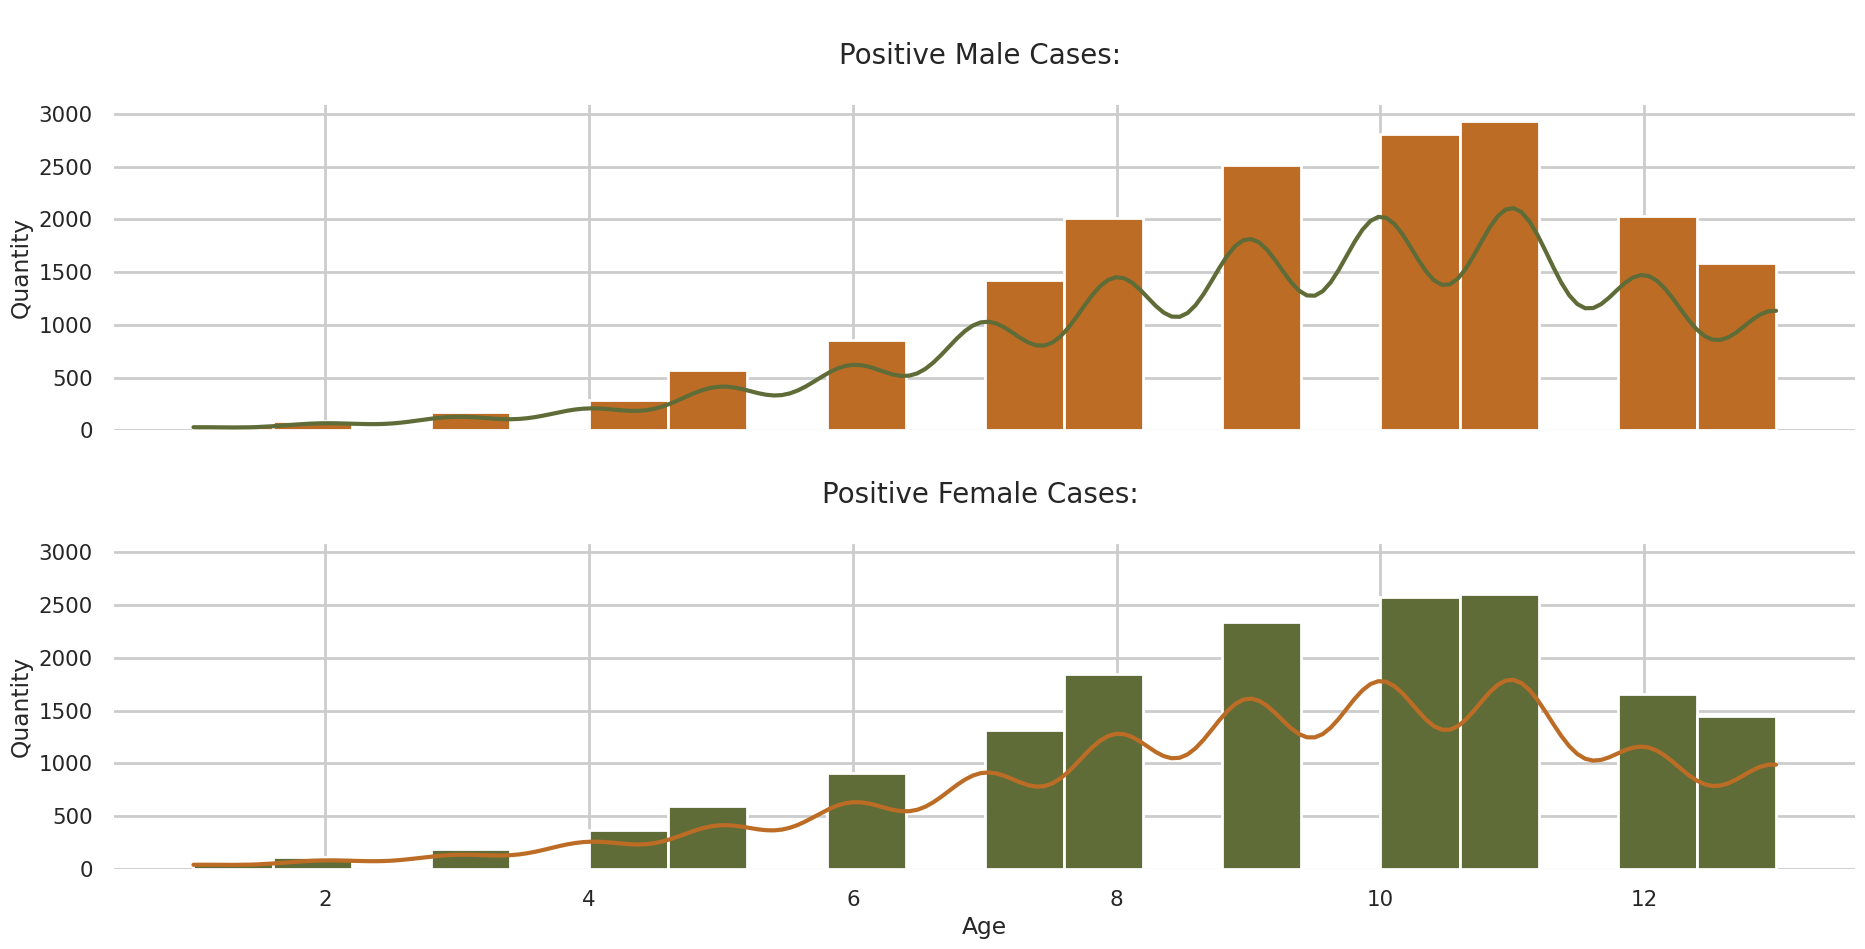

In [12]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(df_temp_pos[df_temp_pos["Sex"]==1]["Age"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases: \n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(df_temp_pos[df_temp_pos["Sex"]==0]["Age"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases: \n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

## Gender Distribution of Positive Cases

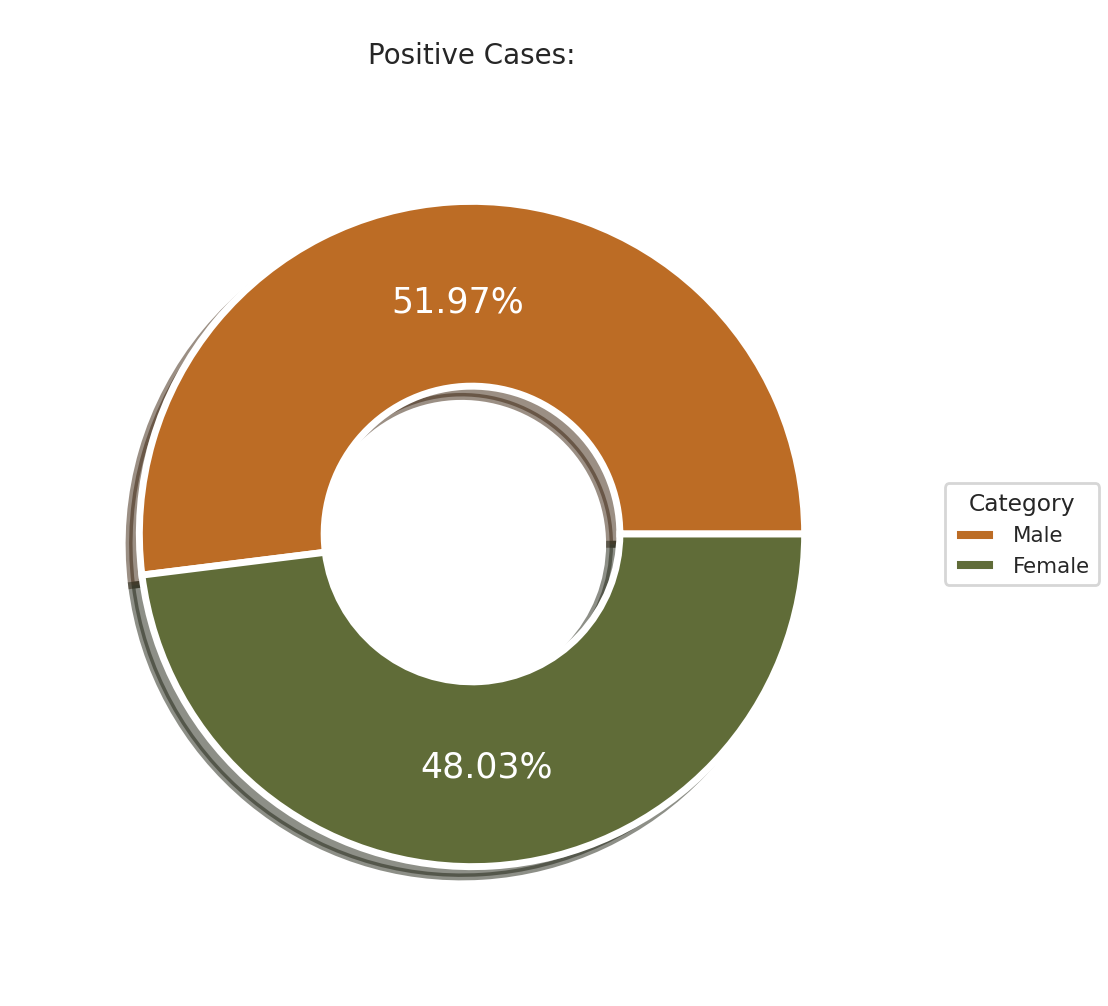

In [13]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(df_temp_pos[df_temp_pos["Sex"]==1]["Sex"]),
                                    len(df_temp_pos[df_temp_pos["Sex"]==0]["Sex"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#BC6C25","#606C38"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases:",fontsize=20)
plt.show()

## Get highly correlated features

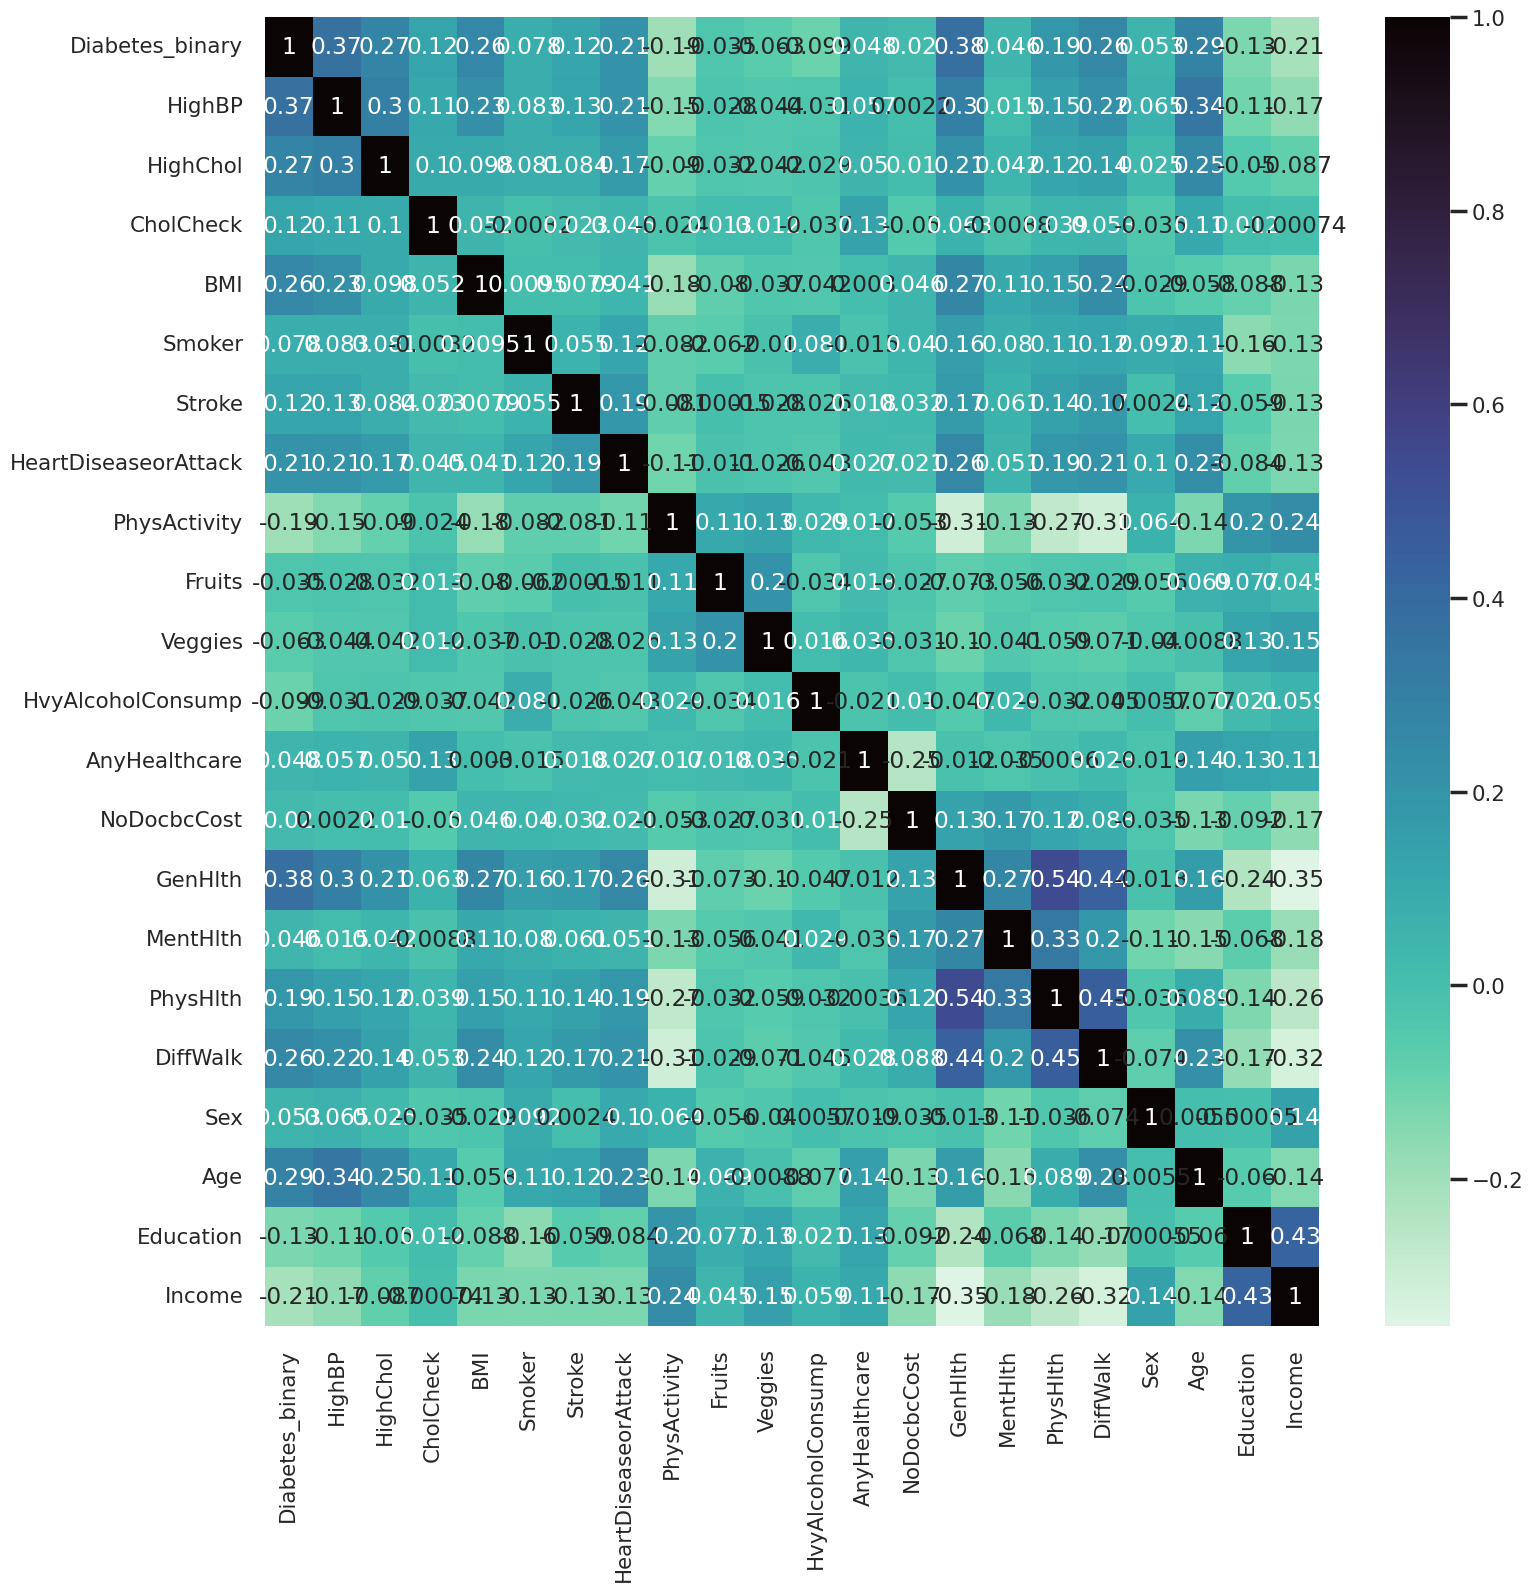

In [14]:
corr = df.corr()
plt.figure(figsize=(17,17))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [15]:
# Get the absolute value of the correlation
cor_target = abs(corr["Diabetes_binary"])

# Select highly correlated features (thresold = 0.1)
relevant_features = cor_target[cor_target>0.1]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('Diabetes_binary')

# Display the results
print(names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


## Asign Data and Labels

In [16]:
X = df[names].values
y = df['Diabetes_binary'].values

In [17]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [18]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std
    return X

In [19]:
X = scale(X)
# y = scale(y)


# Split data into 60% training, 20% development, and 20% testing
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# K-fold cross-validation (if needed)
kf = KFold(n_splits=5)

# # Normalize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [20]:
print(X_train)

[[-1.10822126 -1.0046343   0.15663215 ...  0.49437342 -0.02859091
  -1.87616438]
 [-1.10822126 -1.0046343   0.15663215 ... -0.1674391  -1.04650389
   0.60228298]
 [-1.10822126 -1.0046343   0.15663215 ...  1.48709221 -1.04650389
  -1.05001526]
 ...
 [-1.10822126 -1.0046343   0.15663215 ...  1.48709221  0.98932207
  -0.6369407 ]
 [-1.10822126 -1.0046343   0.15663215 ... -1.16015788 -0.02859091
   0.18920842]
 [ 0.90234688 -1.0046343   0.15663215 ...  0.82527969  0.98932207
  -0.6369407 ]]


In [21]:
print(y_train)

[1 0 0 ... 1 0 1]


In [22]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('X dev shape: ', X_dev.shape)
print('Y dev shape: ', y_dev.shape)

X train shape:  (39840, 13)
Y train shape:  (39840,)
X test shape:  (13279, 13)
Y test shape:  (13279,)
X dev shape:  (13280, 13)
Y dev shape:  (13280,)


<a id="5"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Model Implementation Helper Functions</center></h1>

# Model Implementation Helper Functions
  

## Imports

In [23]:
!pip install keras-tuner --upgrade


In [24]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping


## Multi Layer Perceptron 

In [25]:
# Build a deep learning model (MLP)
model_MLP = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model_MLP.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## Multi Layer Perceptron Dropout 0.5

In [26]:
# Build a deep learning model (MLP) with Dropout
model_MLP_dropout = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),  # Dropout with 50% rate
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout with 50% rate
    Dense(16, activation='relu'),
    Dropout(0.5),  # Dropout with 50% rate
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model_MLP_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## Multi Layer Perceptron Dropout 0.5 Kernel Regularizer 0.001

In [27]:
model_MLP_droupout_l2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_MLP_droupout_l2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

<a id="6"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Model Implementation</center></h1>

# Model Implementation 
  

## Multi Layer Perceptron

In [28]:
# Compile the model
model_MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting during tuning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history_model_MLP = model_MLP.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model_MLP.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/50


I0000 00:00:1727169796.003126      77 service.cc:145] XLA service 0x7b5c70005540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727169796.003169      77 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727169796.003172      77 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 105/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6615 - loss: 0.6035

I0000 00:00:1727169797.369482      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7232 - loss: 0.5410 - val_accuracy: 0.7367 - val_loss: 0.5274
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7424 - loss: 0.5190 - val_accuracy: 0.7407 - val_loss: 0.5254
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7454 - loss: 0.5184 - val_accuracy: 0.7369 - val_loss: 0.5296
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 0.5211 - val_accuracy: 0.7391 - val_loss: 0.5279
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7437 - loss: 0.5141 - val_accuracy: 0.7403 - val_loss: 0.5254
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7438 - loss: 0.5194 - val_accuracy: 0.7391 - val_loss: 0.5255
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7472 - loss: 0.5156 - val_accuracy: 0.7403 - val_loss: 0.5257
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7469 - loss: 0.5112 - val_accurac

## Multi Layer Perceptron Dropout 0.5

In [29]:
# Compile the model
model_MLP_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback to prevent overfitting during tuning
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history_MLP_dropout = model_MLP_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model_MLP_dropout.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6304 - loss: 0.6626 - val_accuracy: 0.7299 - val_loss: 0.5464
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7235 - loss: 0.5660 - val_accuracy: 0.7354 - val_loss: 0.5414
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7306 - loss: 0.5534 - val_accuracy: 0.7365 - val_loss: 0.5361
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7339 - loss: 0.5493 - val_accuracy: 0.7373 - val_loss: 0.5328
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7324 - loss: 0.5518 - val_accuracy: 0.7403 - val_loss: 0.5286
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.5473 - val_accuracy: 0.7379 - val_loss: 0.5275
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7395 - loss: 0.5446 - val_accuracy: 0.7376 - val_loss: 0.5291
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7345 - loss: 0.5467 - 

## Multi Layer Perceptron Dropout 0.5 Kernel Regularizer 0.001

In [30]:
# Compile the model
model_MLP_droupout_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_MLP_droupout_l2 = model_MLP_droupout_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model_MLP_droupout_l2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7214 - loss: 0.6290 - val_accuracy: 0.7397 - val_loss: 0.5570
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7384 - loss: 0.5489 - val_accuracy: 0.7378 - val_loss: 0.5395
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7430 - loss: 0.5381 - val_accuracy: 0.7364 - val_loss: 0.5391
Epoch 4/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7362 - loss: 0.5369 - val_accuracy: 0.7371 - val_loss: 0.5367
Epoch 5/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7426 - loss: 0.5309 - val_accuracy: 0.7376 - val_loss: 0.5352
Epoch 6/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7405 - loss: 0.5312 - val_accuracy: 0.7351 - val_loss: 0.5370
Epoch 7/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7412 - loss: 0.5303 - val_accuracy: 0.7391 - val_loss: 0.5333
Epoch 8/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7397 - loss: 0.5323 - 

## Multi Layer Perceptron HyperParameters

In [31]:
def build_complex_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_dim=X_train.shape[1]))

    # Batch normalization
    model.add(tf.keras.layers.BatchNormalization())

    # Tune the dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.6, step=0.1)
    model.add(Dropout(rate=hp_dropout))

    # Add additional Dense layers with more complexity
    for i in range(hp.Int('num_layers', 2, 5)):  # More layers
        hp_units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        model.add(Dense(units=hp_units, activation=hp.Choice('activation', ['relu', 'tanh', 'leaky_relu'])))
        
        # Option to add L2 regularization
        hp_l2 = hp.Float(f'l2_{i}', min_value=1e-4, max_value=1e-2, sampling='log')
        model.add(Dense(units=hp_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(hp_l2)))

        # Batch Normalization in between layers
        model.add(tf.keras.layers.BatchNormalization())

        model.add(Dropout(rate=hp_dropout))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate for the Adam optimizer
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Clear previous tunings or use a different project name
tuner = kt.Hyperband(build_complex_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='hyperband_tuning',
                     project_name='lung_cancer_classification_v3')  # Change project name

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_dev, y_dev), callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build and train the best model
model = tuner.hypermodel.build(best_hps)
history_MLP_dropout_hypertuning = model.fit(X_train, y_train, epochs=50, validation_data=(X_dev, y_dev), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Trial 90 Complete [00h 01m 04s]
val_accuracy: 0.743147611618042

Best val_accuracy So Far: 0.7459337115287781
Total elapsed time: 01h 01m 46s
Best hyperparameters: {'units': 192, 'dropout': 0.5, 'num_layers': 4, 'units_0': 128, 'activation': 'relu', 'l2_0': 0.0001384744715837039, 'units_1': 64, 'l2_1': 0.0029006203636140547, 'learning_rate': 0.003931395207345373, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'units_2': 32, 'l2_2': 0.0001, 'units_3': 32, 'l2_3': 0.0001, 'tuner/trial_id': '0001', 'units_4': 32, 'l2_4': 0.0011857286512445679}
Epoch 1/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6571 - loss: 0.8111 - val_accuracy: 0.7372 - val_loss: 0.5692
Epoch 2/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7259 - loss: 0.5856 - val_accuracy: 0.7425 - val_loss: 0.5551
Epoch 3/50
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7267 - loss: 0.5743 - val_accuracy: 0.7203 - val_loss: 0.5579
Epoch 4/50
1245/1245 ━━━━━

<a id="7"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Evaluation</center></h1>

# Evaluation
  

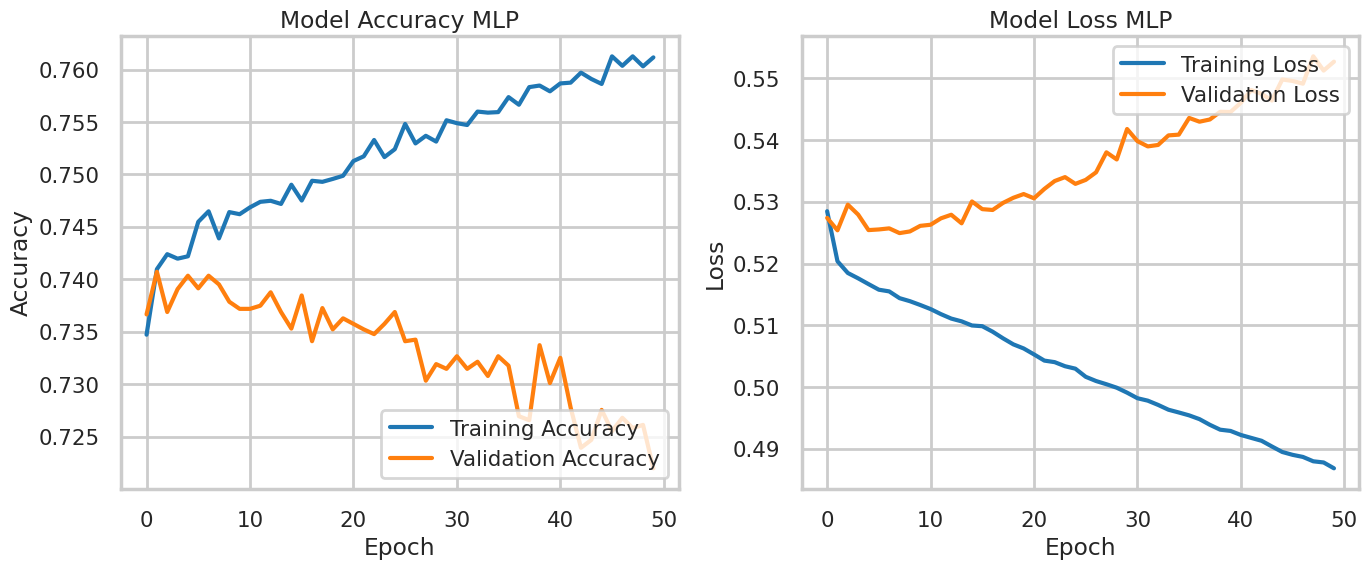

In [32]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_model_MLP.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_model_MLP.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_model_MLP.history['loss'], label='Training Loss')
ax[1].plot(history_model_MLP.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

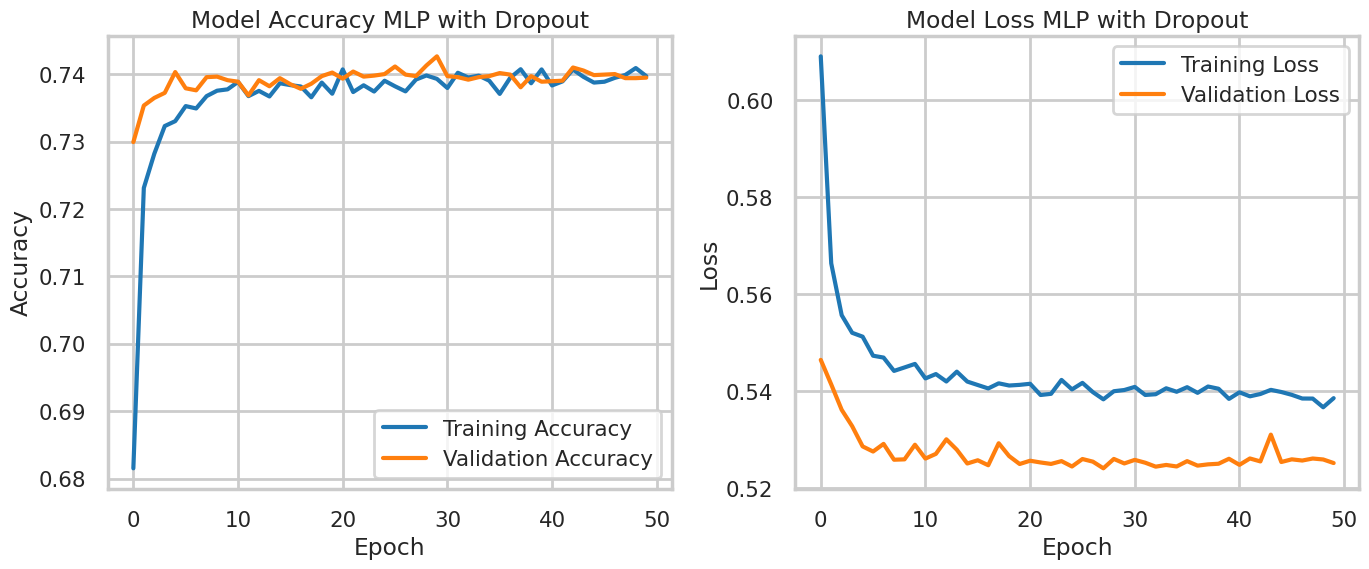

In [33]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_MLP_dropout.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_MLP_dropout.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP with Dropout')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_MLP_dropout.history['loss'], label='Training Loss')
ax[1].plot(history_MLP_dropout.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP with Dropout')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

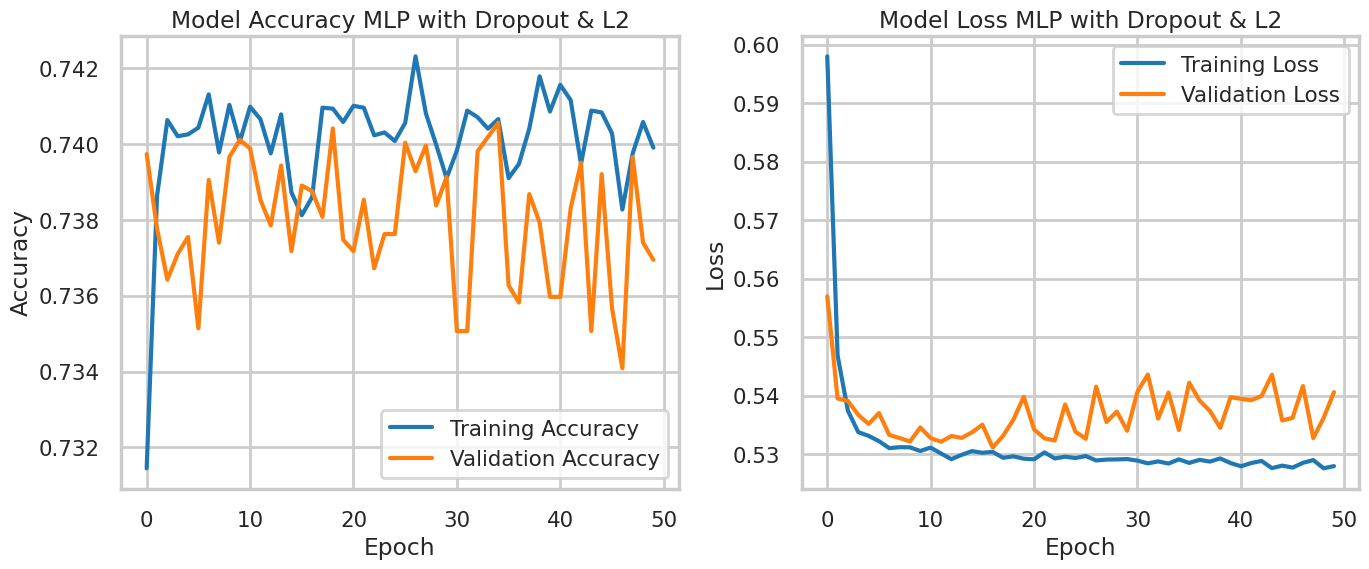

In [34]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_MLP_droupout_l2.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_MLP_droupout_l2.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP with Dropout & L2')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_MLP_droupout_l2.history['loss'], label='Training Loss')
ax[1].plot(history_MLP_droupout_l2.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP with Dropout & L2')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

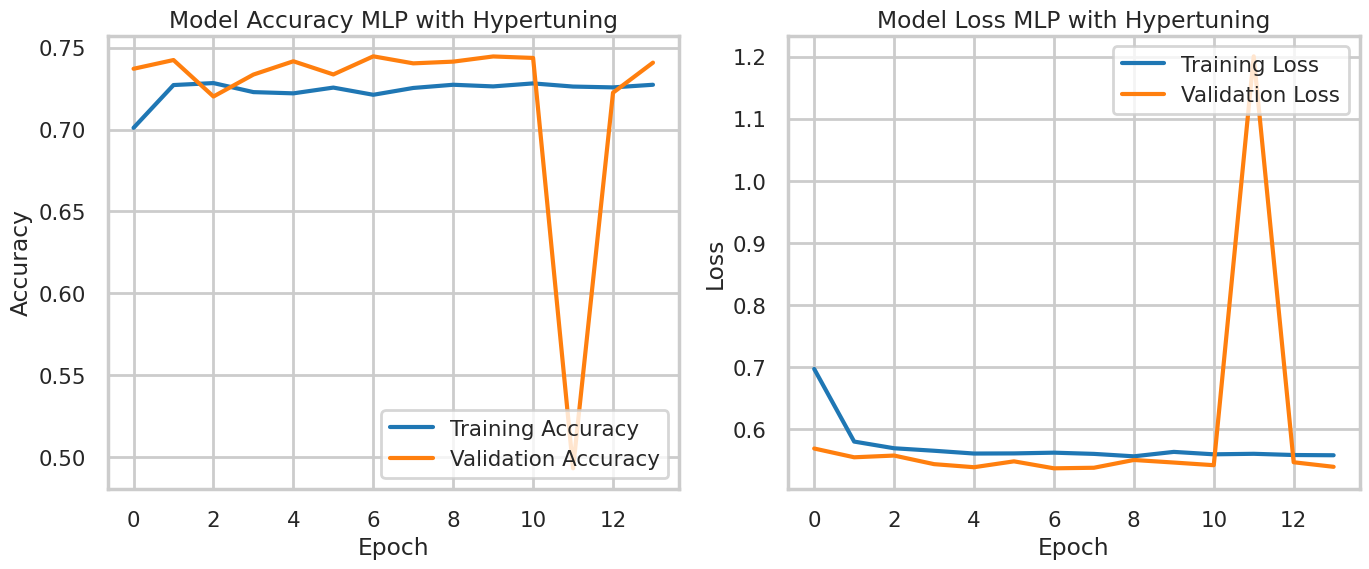

In [35]:
# Buat figure dengan 2 subplots, satu untuk accuracy dan satu untuk loss
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy di subplot kiri (ax[0])
ax[0].plot(history_MLP_dropout_hypertuning.history['accuracy'], label='Training Accuracy')
ax[0].plot(history_MLP_dropout_hypertuning.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy MLP with Hypertuning')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Plot loss di subplot kanan (ax[1])
ax[1].plot(history_MLP_dropout_hypertuning.history['loss'], label='Training Loss')
ax[1].plot(history_MLP_dropout_hypertuning.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss MLP with Hypertuning')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

# Tampilkan plot
plt.tight_layout()
plt.show()

<a id="8"></a>
<h1 style='background:#FEFAE0;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #BC6C25;'>Thankyou</center></h1>

# Thankyou
  